In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

In [17]:
# Load Data
inputs = pd.read_csv('data/inputs.csv')
labels = pd.read_csv('data/labels.csv')
data = pd.concat([inputs, labels['HadHeartAttack']], axis=1)

In [18]:
def preprocess_data(df):
    # Create a copy to avoid modifying original data
    df_processed = df.copy()
    
    # Identify object columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Initialize label encoders dictionary
    encoders = {}
    
    # Process each object column
    for column in object_columns:
        encoders[column] = LabelEncoder()
        df_processed[column] = encoders[column].fit_transform(df[column])
    
    return df_processed, encoders

processed_inputs, encoders = preprocess_data(data)

In [19]:
# Basic info
print("Data Info:")
print(processed_inputs.info())
print("\nLabel Distribution:")
print(processed_inputs['HadHeartAttack'].value_counts(normalize=True))

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190157 entries, 0 to 190156
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  190157 non-null  int64  
 1   State                      190157 non-null  int64  
 2   Sex                        190157 non-null  int64  
 3   GeneralHealth              190157 non-null  int64  
 4   AgeCategory                190157 non-null  int64  
 5   HeightInMeters             190157 non-null  float64
 6   WeightInKilograms          190157 non-null  float64
 7   BMI                        190157 non-null  float64
 8   HadAngina                  190157 non-null  int64  
 9   HadStroke                  190157 non-null  int64  
 10  HadAsthma                  190157 non-null  int64  
 11  HadSkinCancer              190157 non-null  int64  
 12  HadCOPD                    190157 non-null  int64  
 13  HadDepressiveDisor

In [20]:
# Target correlation analysis
target_corr = processed_inputs.corr()['HadHeartAttack'].sort_values(ascending=False)
print("\nCorrelation with target variable:")
print(target_corr)


Correlation with target variable:
HadHeartAttack               1.000000
HadAngina                    0.445970
HadStroke                    0.175919
AgeCategory                  0.173458
ChestScan                    0.169416
DifficultyWalking            0.159516
HadDiabetes                  0.137834
HadCOPD                      0.132328
PneumoVaxEver                0.122172
HadArthritis                 0.117649
HadKidneyDisease             0.108911
DeafOrHardOfHearing          0.096886
DifficultyErrands            0.089696
DifficultyDressingBathing    0.083397
BlindOrVisionDifficulty      0.073390
Sex                          0.070952
DifficultyConcentrating      0.051804
HadSkinCancer                0.050031
FluVaxLast12                 0.047062
WeightInKilograms            0.037117
BMI                          0.030193
RaceEthnicityCategory        0.024931
HadAsthma                    0.024779
HadDepressiveDisorder        0.023184
HeightInMeters               0.021084
TetanusLast10Td

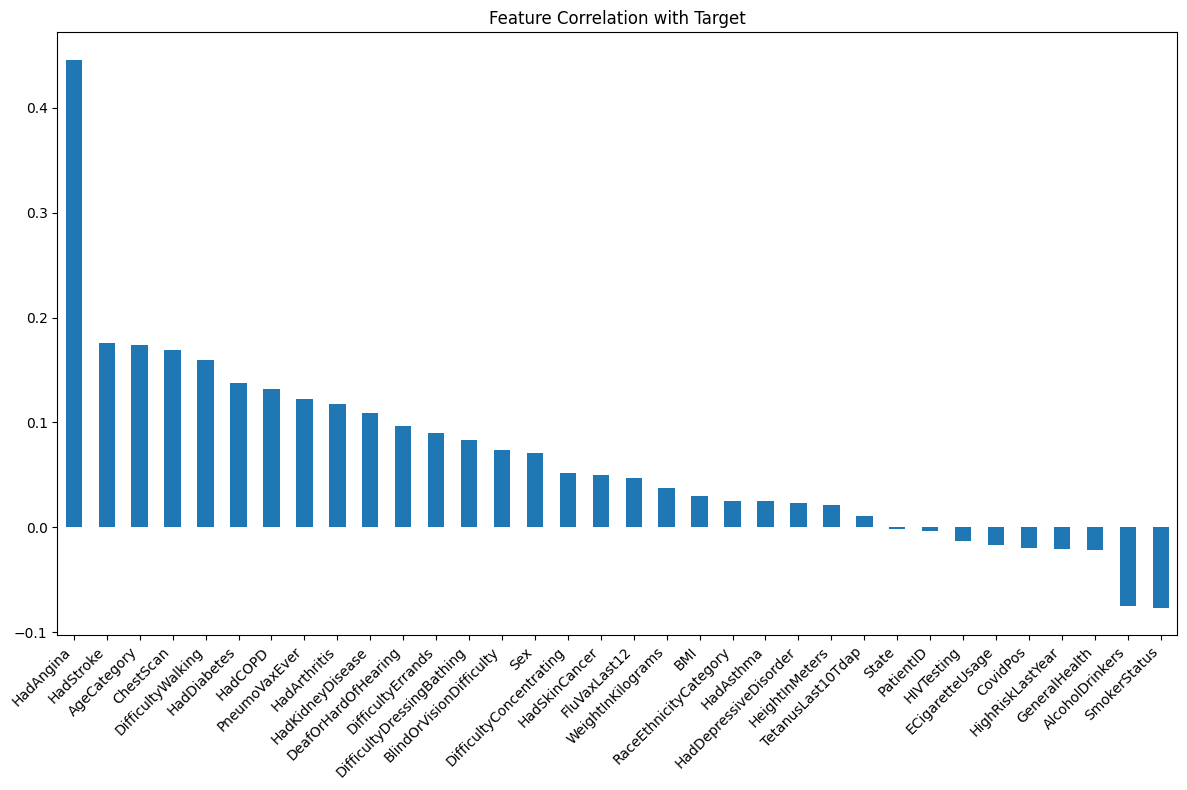

In [21]:
# Visualizations
plt.figure(figsize=(12, 8))
target_corr.drop('HadHeartAttack').plot(kind='bar')
plt.title('Feature Correlation with Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

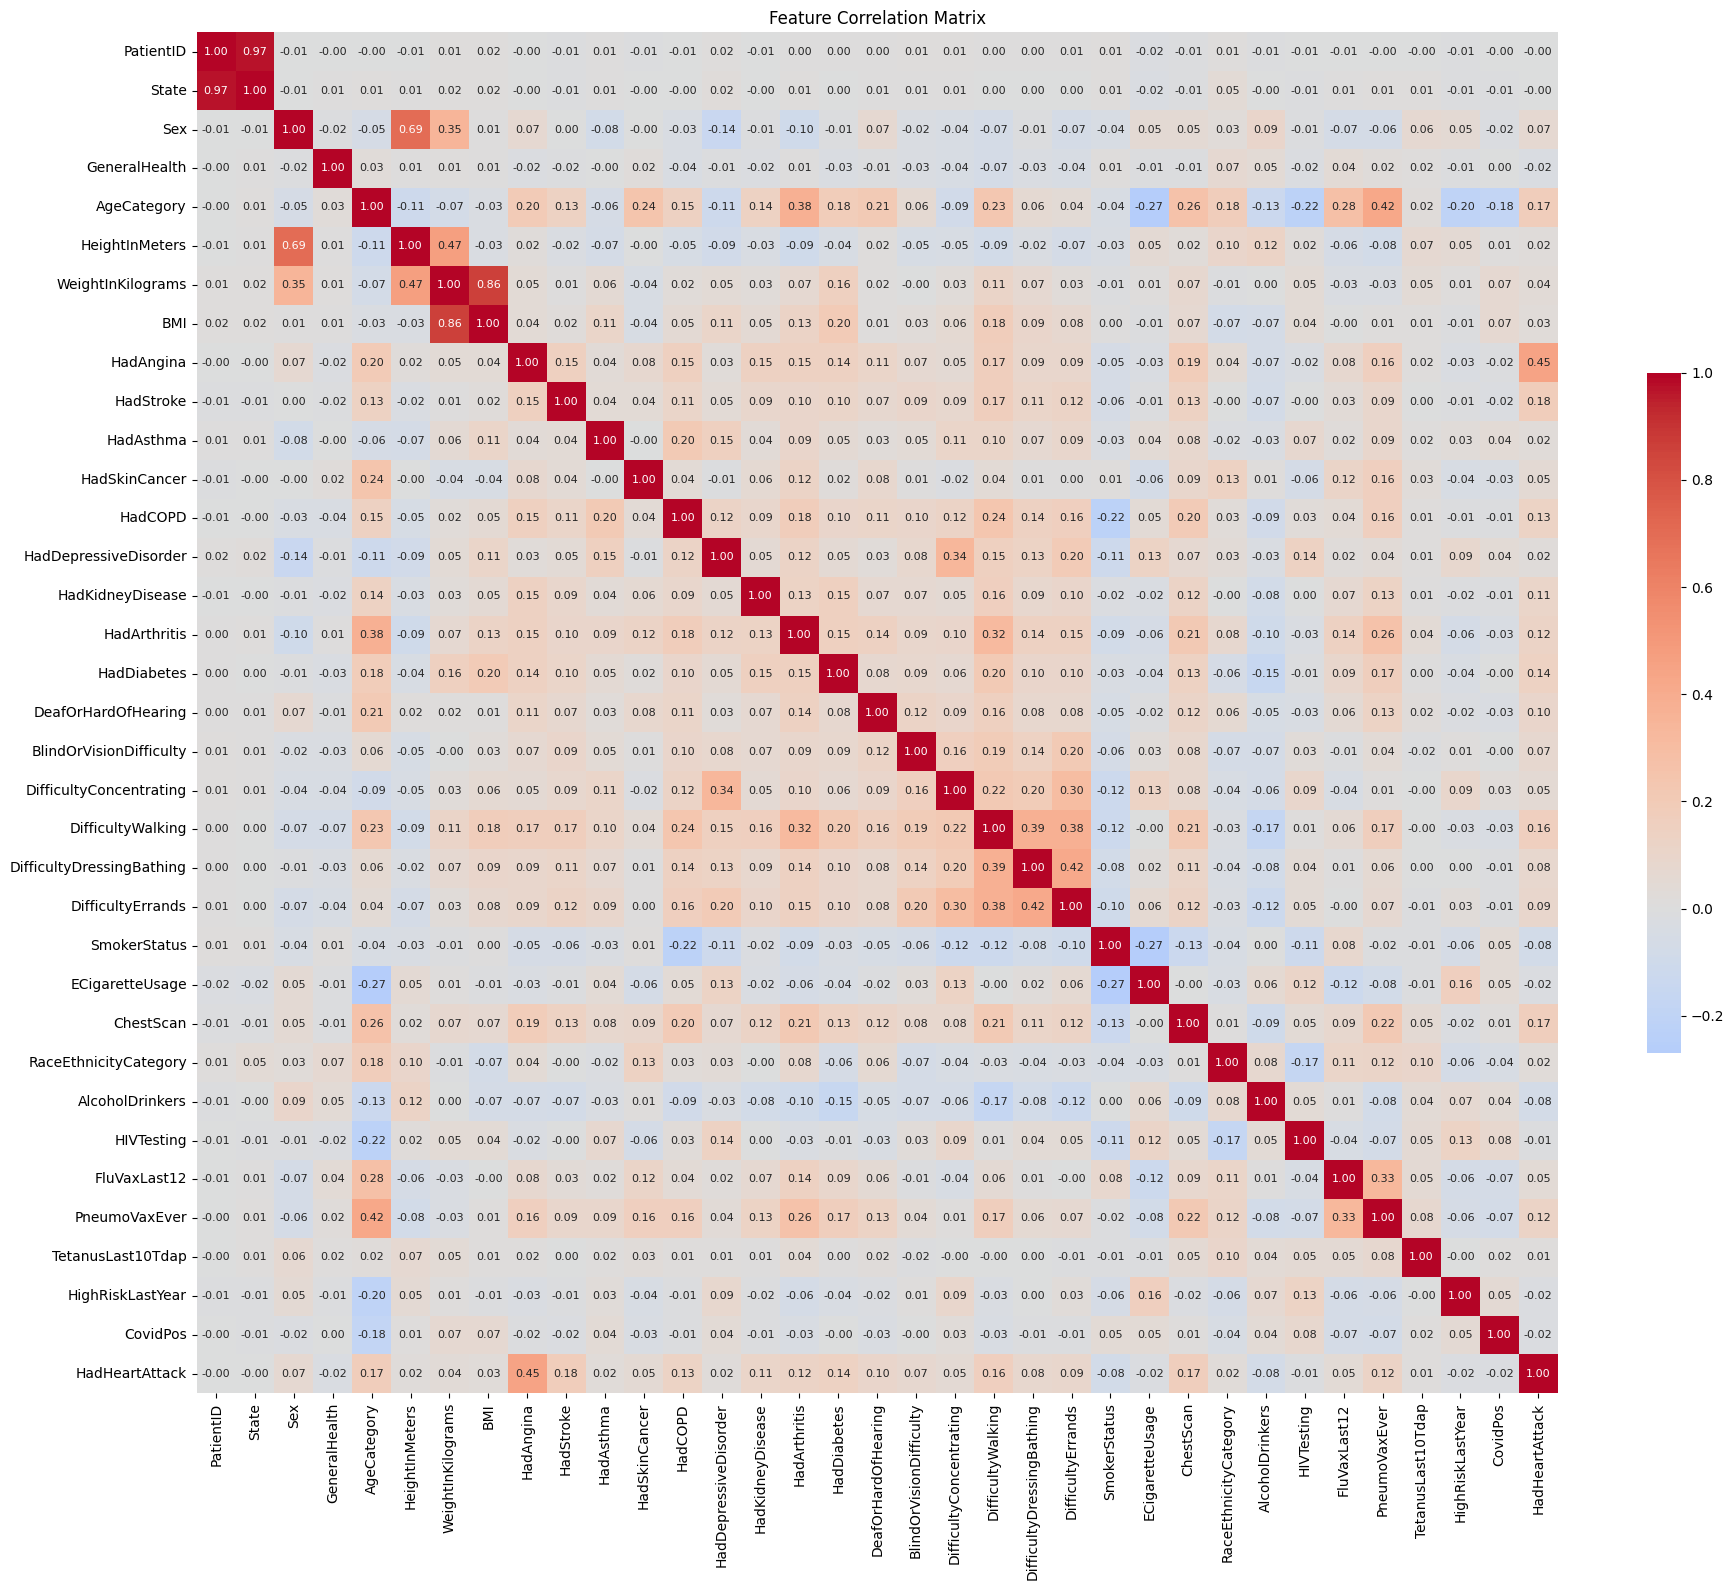

In [25]:
# Overall correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(processed_inputs.corr(), 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .5},
            annot_kws={'size': 8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [31]:
# Save processed data and encoders
processed_inputs.to_csv('data/processed_inputs.csv', index=False)
joblib.dump(encoders, 'data/encoders.joblib')

['data/encoders.joblib']